# Speech Emotion Recognition With Convolutional Neural Network

<a id="1"></a>
# Including Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
from tensorflow.keras.models import load_model
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("done")

c:\Users\rahul\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


done


<a id="2"></a>
# Including the Datasets

In [2]:

Ravdess_Path='Ravdess/audio_speech_actors_01-24'

print("done")

done


<a id="3"></a>
# Data Analyze

In [3]:
ravdess=[]
for directory in os.listdir(Ravdess_Path):
    actors=os.listdir(os.path.join(Ravdess_Path,directory))
    for wav in actors:
        emotion=wav.partition('.wav')[0].split('-')
        emotion_number=int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

Emotion                                          File_Path
0  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
1  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
2  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
3  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
4  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...

In [4]:
Ravdess_df['Emotion'].unique()

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [5]:
main_df=Ravdess_df.copy()
main_df.shape

(1440, 2)

In [6]:
main_df.head(15)

Emotion                                          File_Path
0   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
1   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
2   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
3   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
4   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
5   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
6   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
7   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
8   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
9   neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
10  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
11  neutral  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
12    happy  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
13    happy  Ravdess/audio_speech_actors_01-24\Actor_01\03-...
14    happy  Ravdess/audio_speech_actors_01-24\Actor_01\03-...

In [7]:
main_df.tail(15)

Emotion                                          File_Path
1425   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1426   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1427   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1428   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1429   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1430   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1431   disgust  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1432  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1433  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1434  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1435  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1436  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1437  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1438  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...
1439  surprise  Ravdess/audio_speech_actors_01-24\Actor_24\03-...

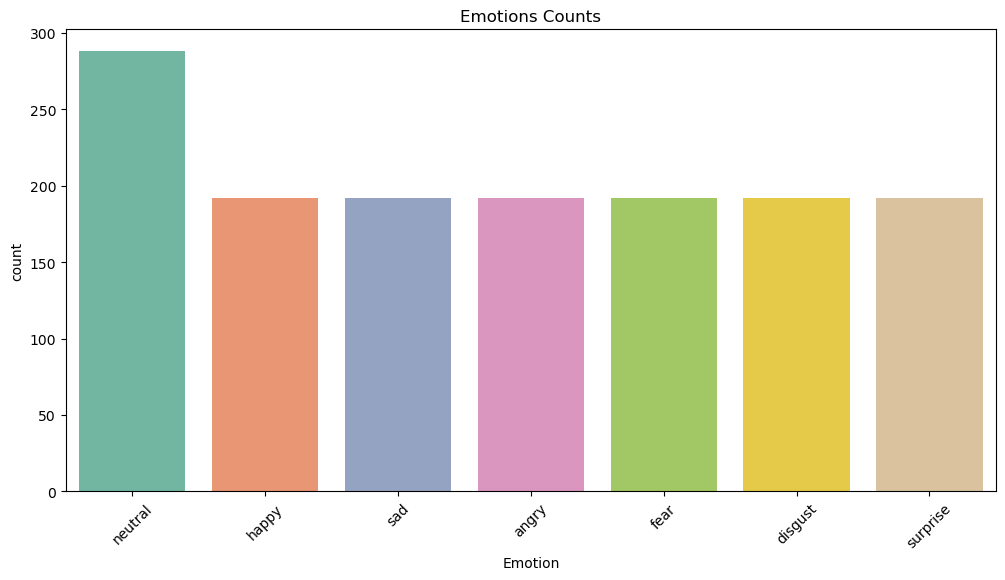

In [8]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [9]:
emotion_names=main_df['Emotion'].unique()
emotion_names

array(['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
      dtype=object)

In [10]:
print("done")
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

done


In [11]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [12]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')
print("done")

done


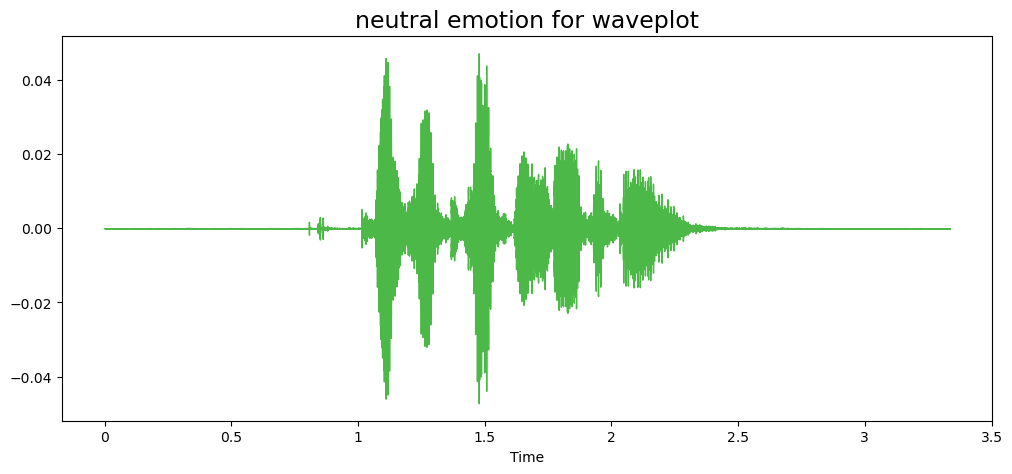

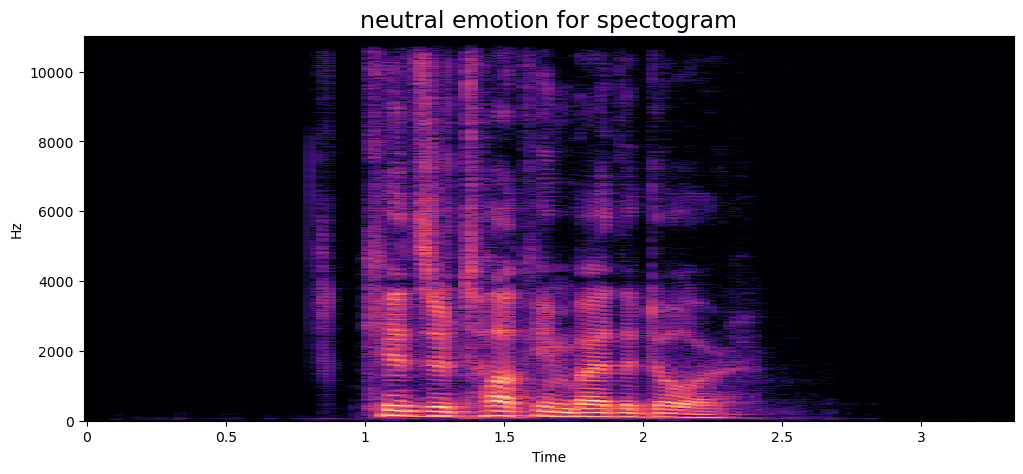

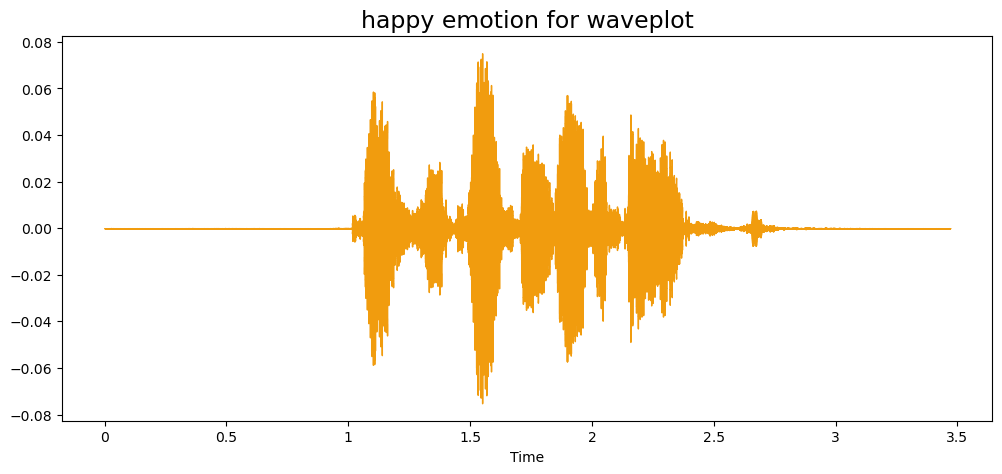

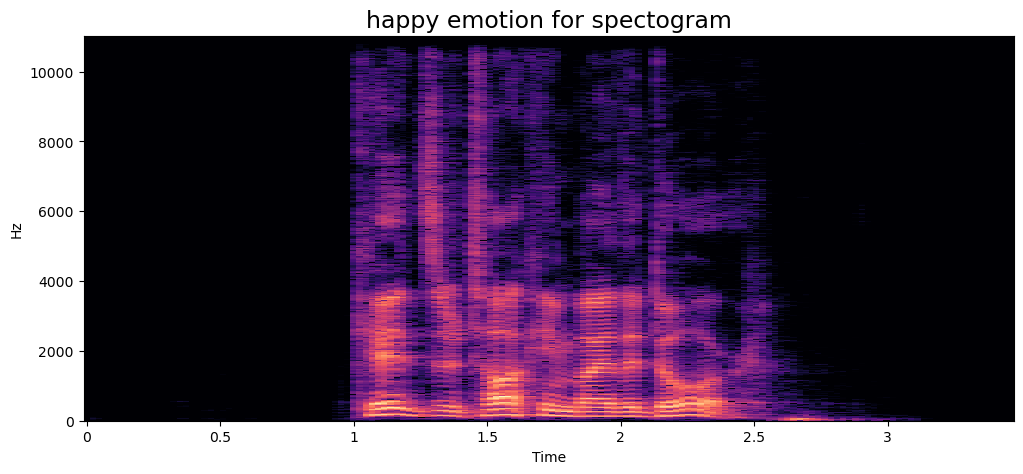

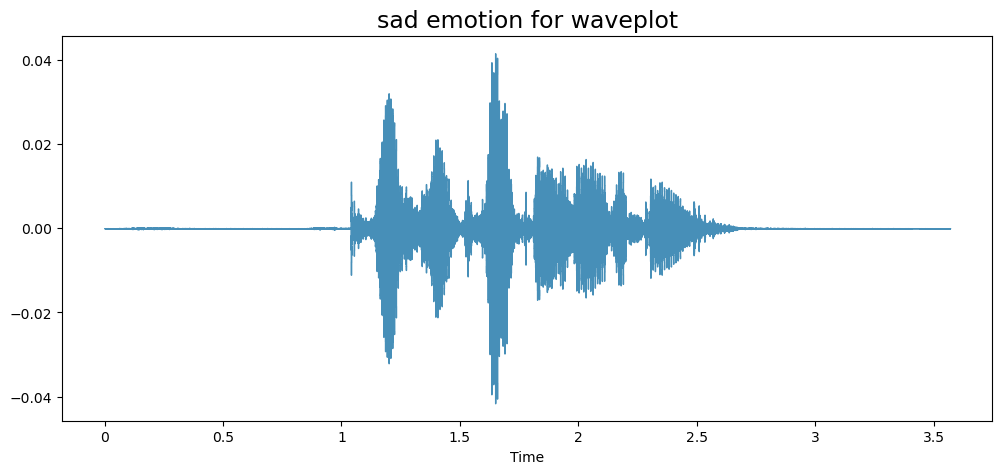

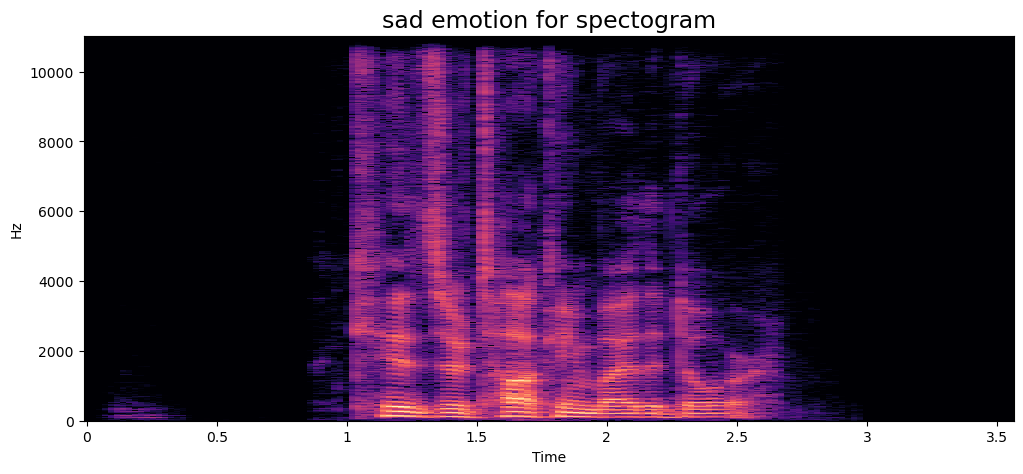

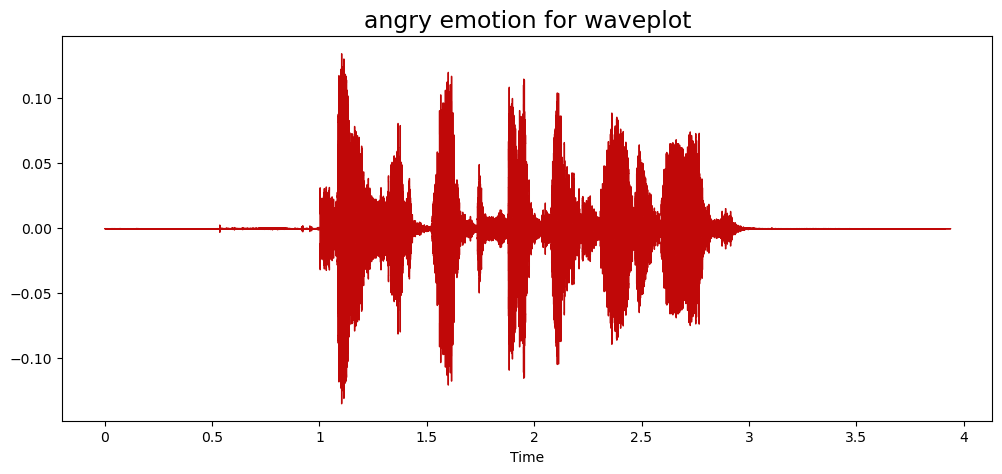

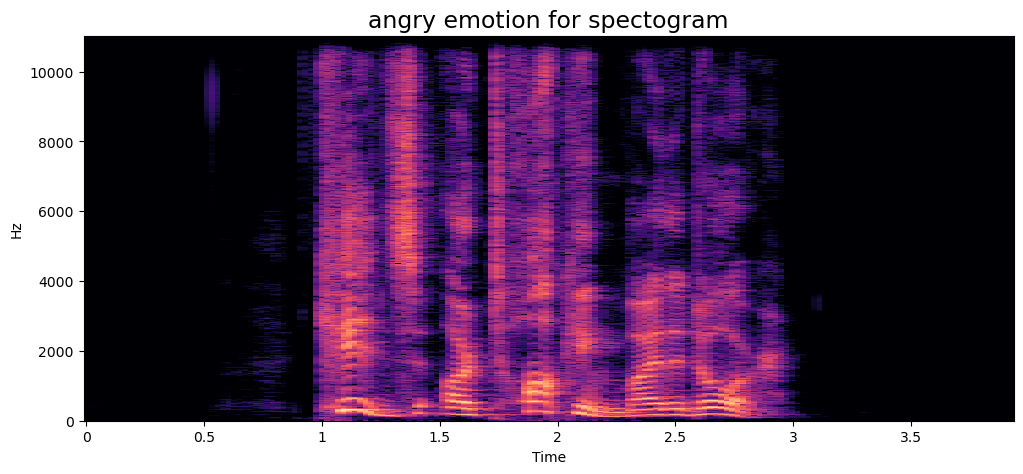

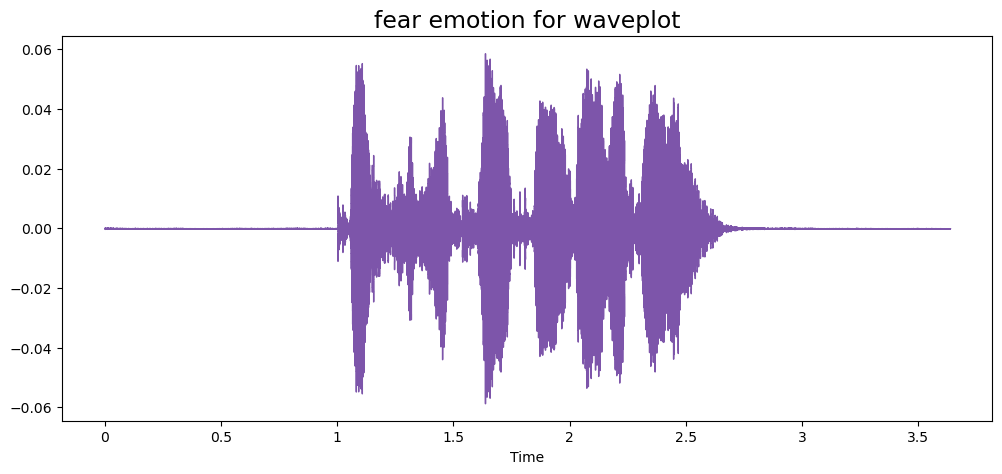

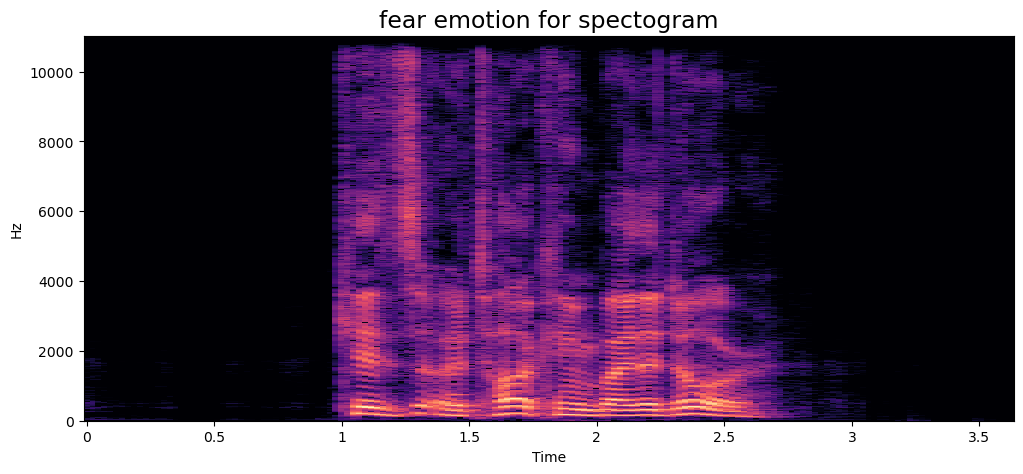

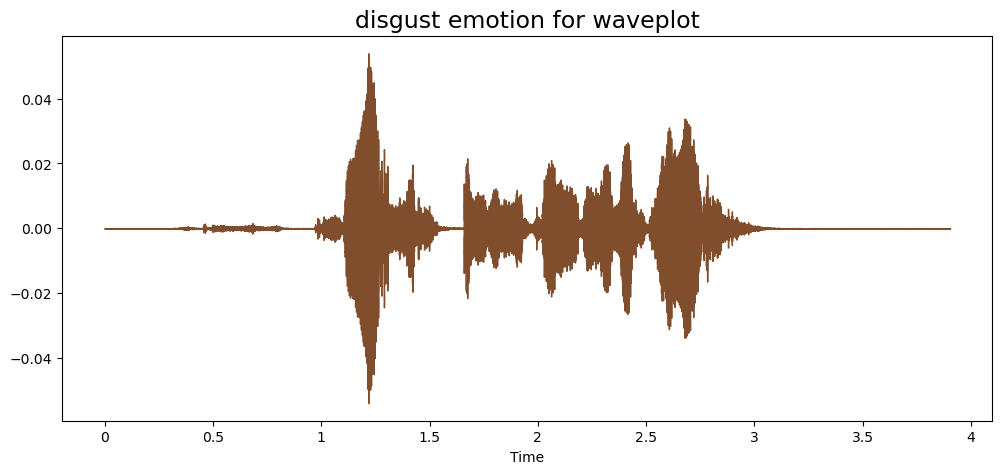

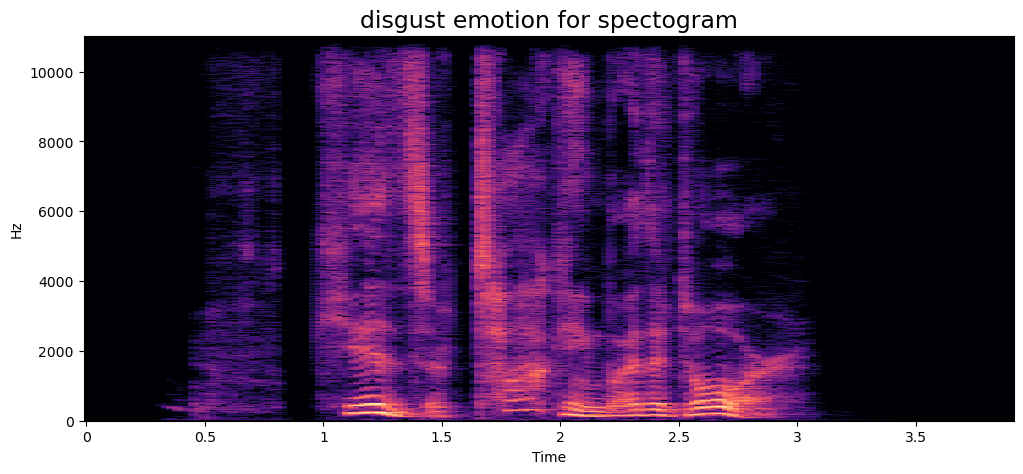

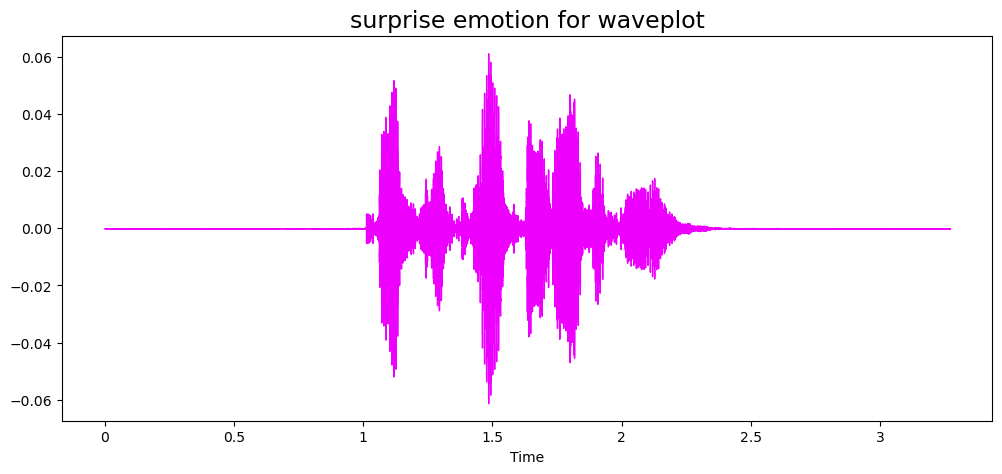

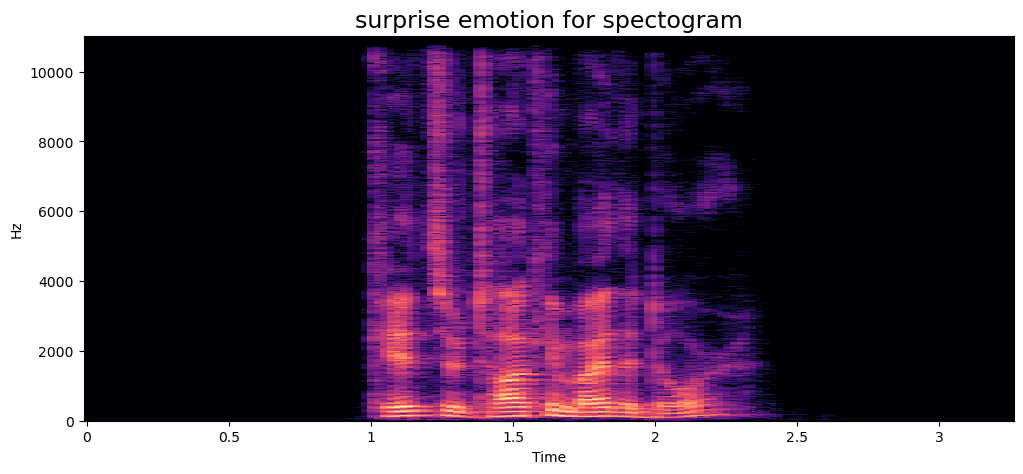

In [13]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

In [14]:
print('Suprise Audio Sample\n')
IPython.display.Audio(audio_path[0])

Suprise Audio Sample



In [15]:
print('Neutral Audio Sample\n')
IPython.display.Audio(audio_path[1])

Neutral Audio Sample



In [16]:
print('Disgust Audio Sample\n')
IPython.display.Audio(audio_path[2])

Disgust Audio Sample



In [17]:
print('Fear Audio Sample\n')
IPython.display.Audio(audio_path[3])

Fear Audio Sample



In [18]:
print('Sad Audio Sample\n')
IPython.display.Audio(audio_path[4])

Sad Audio Sample



In [19]:
print('Happy Audio Sample\n')
IPython.display.Audio(audio_path[5])

Happy Audio Sample



In [20]:
print('Angry Audio Sample\n')
IPython.display.Audio(audio_path[6])

Angry Audio Sample



<a id="7"></a>
## Audio Augmentation

In [21]:
data,sr=librosa.load(audio_path[6])

<a id="13"></a>
## Feature Extraction

In [22]:
def zcr(data,frame_length=2048,hop_length=512):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result



In [23]:
librosa.feature.rms(y=data)

array([[2.51557390e-06, 3.56527607e-06, 4.09975564e-06, 3.77978449e-06,
        3.54783583e-06, 2.64190339e-06, 1.78000391e-06, 1.30995511e-06,
        1.44401929e-06, 1.96458200e-06, 2.08406141e-06, 2.20102515e-06,
        2.16847138e-06, 1.59175954e-06, 1.61373168e-06, 3.17133754e-06,
        3.10442738e-06, 3.11678900e-06, 3.00858210e-06, 1.04364381e-06,
        9.53882477e-07, 8.58325620e-07, 9.93684694e-07, 9.46935188e-07,
        1.44597470e-06, 1.51990787e-06, 1.52893165e-06, 1.46755281e-06,
        9.79564788e-07, 8.51344339e-07, 2.00415548e-06, 2.00415548e-06,
        2.00415548e-06, 1.93570850e-06, 1.00398063e-06, 2.22030735e-06,
        2.35285506e-06, 2.37221047e-06, 2.61803598e-06, 6.10170127e-06,
        1.09876146e-05, 1.33908597e-05, 6.39246136e-04, 8.75758822e-04,
        2.62105628e-03, 7.42123509e-03, 1.17549282e-02, 1.52963875e-02,
        1.55288326e-02, 1.40220290e-02, 1.07561154e-02, 4.55028517e-03,
        3.57065187e-03, 4.81863134e-03, 7.39415269e-03, 8.190223

In [24]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    data,sr=librosa.load(path,duration=2.5,offset=0.6)
    aud=extract_features(data,sr)
#     print(features)
    if index%500==0:
        print(f'{index} audio has been processed')
#     for i in aud:
    X.append(aud)
    Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
Done


In [25]:
len(X[0])

2376

<a id="14"></a>
## Processing

In [26]:
len(X)

1440

In [27]:
processed_data_path='./processed_data.csv'

In [28]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

0         1         2         3         4         5         6  \
0  0.173828  0.264648  0.372559  0.486328  0.625488  0.681152  0.720703   
1  0.247070  0.389648  0.564941  0.642578  0.665527  0.684570  0.676270   
2  0.183105  0.376953  0.551270  0.642090  0.800781  0.777832  0.801270   
3  0.248535  0.411621  0.514160  0.417480  0.604980  0.636719  0.708008   
4  0.220215  0.377930  0.377930  0.441406  0.338867  0.388184  0.604004   
5  0.238281  0.420410  0.609375  0.645508  0.736816  0.694336  0.702148   
6  0.241699  0.412598  0.623535  0.718262  0.804688  0.801758  0.747559   
7  0.393555  0.585938  0.804688  0.791504  0.813965  0.844238  0.857422   
8  0.095215  0.279785  0.389160  0.563477  0.643555  0.682617  0.786133   
9  0.285645  0.482910  0.561523  0.444336  0.479492  0.438965  0.583008   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.651855  0.562988  0.559082  ...  0.766315  0.755441  0.743671  0.731043   
1  0.666992  0.648926  0.595703  ...  0.000000  0.000000  0.000000  0.000000   
2  0.789551  0.794922  0.850098  ...  0.000000  0.000000  0.000000  0.000000   
3  0.695312  0.612793  0.417480  ...  1.722428  1.677533  1.629524  1.578606   
4  0.743652  0.846191  0.864746  ...  3.523633  4.199511  4.686327  5.017312   
5  0.727539  0.619141  0.673340  ...  0.664747  0.588181  0.522603  0.464825   
6  0.712891  0.732910  0.729004  ...  1.522454  1.461703  1.396935  1.328457   
7  0.816895  0.790527  0.650879  ...  2.193186  1.998329  1.889519  1.860717   
8  0.817871  0.799316  0.712891  ... -0.337226 -0.393792 -0.262259  0.046062   
9  0.614746  0.720703  0.769043  ...  6.354140 -2.040874 -6.919799  8.188861   

       2371      2372      2373      2374      2375  Emotion  
0  0.717561  0.703260  0.688124  0.672208  0.655518  neutral  
1  0.000000  0.000000  0.000000  0.000000  0.000000  neutral  
2  0.000000  0.000000  0.000000  0.000000  0.000000  neutral  
3  1.524966  1.468802  1.410371  1.349852  1.287484  neutral  
4  5.242127  5.247079  4.816365  3.861966  2.566169  neutral  
5  0.412410  0.364199  0.320491  0.282779  0.253258  neutral  
6  1.256577  1.181608  1.103920  1.023825  0.941687  neutral  
7  1.899767  1.989579  2.109797  2.238447  2.353966  neutral  
8  0.497785  1.010056  1.476799  1.813757  1.973085  neutral  
9 -9.812509  1.272620 -0.854128 -6.752258  9.705687  neutral  

[10 rows x 2377 columns]

<a id="15"></a>
# Including Analyzed Audio Features

In [29]:
df=pd.read_csv(processed_data_path)
df.shape

(1440, 2377)

In [30]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(1440, 2377)

In [52]:
print(data)

[-4.9753219e-04 -3.0848163e-04  8.6729662e-05 ... -1.5801108e-06
  9.2174810e-07 -4.5220111e-07]


In [31]:
df.head(10)

0         1         2         3         4         5         6  \
0  0.173828  0.264648  0.372559  0.486328  0.625488  0.681152  0.720703   
1  0.247070  0.389648  0.564941  0.642578  0.665527  0.684570  0.676270   
2  0.183105  0.376953  0.551270  0.642090  0.800781  0.777832  0.801270   
3  0.248535  0.411621  0.514160  0.417480  0.604980  0.636719  0.708008   
4  0.220215  0.377930  0.377930  0.441406  0.338867  0.388184  0.604004   
5  0.238281  0.420410  0.609375  0.645508  0.736816  0.694336  0.702148   
6  0.241699  0.412598  0.623535  0.718262  0.804688  0.801758  0.747559   
7  0.393555  0.585938  0.804688  0.791504  0.813965  0.844238  0.857422   
8  0.095215  0.279785  0.389160  0.563477  0.643555  0.682617  0.786133   
9  0.285645  0.482910  0.561523  0.444336  0.479492  0.438965  0.583008   

          7         8         9  ...      2367      2368      2369      2370  \
0  0.651855  0.562988  0.559082  ...  0.766315  0.755441  0.743671  0.731043   
1  0.666992  0.648926  0.595703  ...  0.000000  0.000000  0.000000  0.000000   
2  0.789551  0.794922  0.850098  ...  0.000000  0.000000  0.000000  0.000000   
3  0.695312  0.612793  0.417480  ...  1.722428  1.677533  1.629524  1.578606   
4  0.743652  0.846191  0.864746  ...  3.523633  4.199511  4.686327  5.017312   
5  0.727539  0.619141  0.673340  ...  0.664747  0.588181  0.522603  0.464825   
6  0.712891  0.732910  0.729004  ...  1.522454  1.461703  1.396935  1.328457   
7  0.816895  0.790527  0.650879  ...  2.193186  1.998329  1.889519  1.860717   
8  0.817871  0.799316  0.712891  ... -0.337226 -0.393792 -0.262259  0.046062   
9  0.614746  0.720703  0.769043  ...  6.354140 -2.040874 -6.919799  8.188861   

       2371      2372      2373      2374      2375  Emotion  
0  0.717561  0.703260  0.688124  0.672208  0.655518  neutral  
1  0.000000  0.000000  0.000000  0.000000  0.000000  neutral  
2  0.000000  0.000000  0.000000  0.000000  0.000000  neutral  
3  1.524966  1.468802  1.410371  1.349852  1.287484  neutral  
4  5.242127  5.247079  4.816365  3.861966  2.566169  neutral  
5  0.412410  0.364199  0.320491  0.282779  0.253258  neutral  
6  1.256577  1.181608  1.103920  1.023825  0.941687  neutral  
7  1.899767  1.989579  2.109797  2.238447  2.353966  neutral  
8  0.497785  1.010056  1.476799  1.813757  1.973085  neutral  
9 -9.812509  1.272620 -0.854128 -6.752258  9.705687  neutral  

[10 rows x 2377 columns]

<a id="16"></a>
# Processing Analyzed Data for Training

In [32]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [33]:
from keras.utils import to_categorical

In [34]:
lb=LabelEncoder()
Y=to_categorical(lb.fit_transform(Y))
print(lb.classes_)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


<a id="17"></a>
## Train, Test and Validation Spliting

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1152, 2376), (288, 2376), (1152, 7), (288, 7))

In [36]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((1036, 2376), (288, 2376), (116, 2376), (1036, 7), (288, 7), (116, 7))

In [37]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((1036, 2376), (288, 2376), (116, 2376), (1036, 7), (288, 7), (116, 7))

In [38]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((1036, 2376, 1), (288, 2376, 1), (116, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [39]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [40]:
EPOCH=5
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [41]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [42]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/5
17/17 [==============================] - 200s 11s/step - loss: 2.4404 - accuracy: 0.3282 - val_loss: 46.2234 - val_accuracy: 0.3362 - lr: 0.0010
Epoch 2/5
17/17 [==============================] - 158s 9s/step - loss: 1.1101 - accuracy: 0.5898 - val_loss: 18.5282 - val_accuracy: 0.2414 - lr: 0.0010
Epoch 3/5
17/17 [==============================] - 150s 9s/step - loss: 0.7760 - accuracy: 0.7346 - val_loss: 4.9943 - val_accuracy: 0.2586 - lr: 0.0010
Epoch 4/5
17/17 [==============================] - 236s 14s/step - loss: 0.5526 - accuracy: 0.8069 - val_loss: 5.6153 - val_accuracy: 0.1466 - lr: 0.0010
Epoch 5/5
17/17 [==============================] - 182s 10s/step - loss: 0.3786 - accuracy: 0.8764 - val_loss: 4.5541 - val_accuracy: 0.2155 - lr: 0.0010


In [43]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


<a id="20"></a>
# Drawing Charts

<a id="21"></a>
## Accuracy Charts

In [44]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch --accuracy and validation accuracy chart for the model')
fig.show()

<a id="24"></a>
# Testing Model and Test Results

In [45]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

9/9 [==============================] - 14s 1s/step


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [46]:
y_check=np.argmax(y_test,axis=1)
y_check

array([1, 4, 4, 4, 0, 4, 4, 2, 6, 4, 1, 6, 5, 2, 5, 1, 0, 2, 4, 1, 6, 4,
       4, 5, 2, 5, 6, 6, 1, 0, 6, 0, 3, 2, 6, 4, 1, 0, 3, 0, 4, 4, 4, 0,
       6, 4, 4, 4, 2, 5, 5, 6, 6, 0, 4, 4, 4, 6, 3, 4, 6, 2, 6, 6, 2, 3,
       4, 1, 1, 5, 3, 6, 4, 3, 6, 4, 0, 6, 5, 1, 3, 3, 6, 4, 3, 0, 2, 4,
       3, 4, 4, 4, 0, 0, 4, 1, 6, 3, 3, 6, 1, 2, 0, 2, 5, 6, 3, 1, 2, 4,
       6, 0, 6, 4, 1, 0, 2, 1, 1, 2, 1, 4, 6, 2, 5, 0, 6, 3, 2, 2, 3, 3,
       5, 2, 3, 5, 4, 4, 1, 1, 0, 0, 3, 3, 0, 3, 0, 4, 6, 2, 2, 5, 4, 2,
       3, 4, 2, 5, 6, 2, 5, 0, 0, 5, 3, 4, 0, 4, 5, 6, 4, 2, 0, 1, 2, 4,
       0, 6, 3, 5, 3, 2, 3, 5, 4, 4, 6, 0, 0, 5, 1, 2, 5, 4, 5, 2, 6, 6,
       1, 4, 2, 5, 6, 5, 4, 0, 1, 5, 3, 6, 3, 1, 6, 2, 4, 2, 0, 0, 6, 6,
       5, 6, 1, 2, 5, 1, 4, 5, 5, 4, 5, 6, 5, 1, 6, 0, 0, 1, 0, 4, 1, 4,
       6, 4, 3, 3, 4, 4, 4, 5, 0, 5, 0, 4, 0, 1, 5, 6, 4, 4, 0, 4, 4, 4,
       0, 4, 1, 6, 6, 4, 3, 4, 5, 6, 5, 0, 0, 3, 0, 3, 0, 3, 5, 1, 5, 1,
       3, 5], dtype=int64)

In [47]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 6.9977335929870605
Test Accuracy: 0.25


<a id="25"></a>
## Confusion Matrix

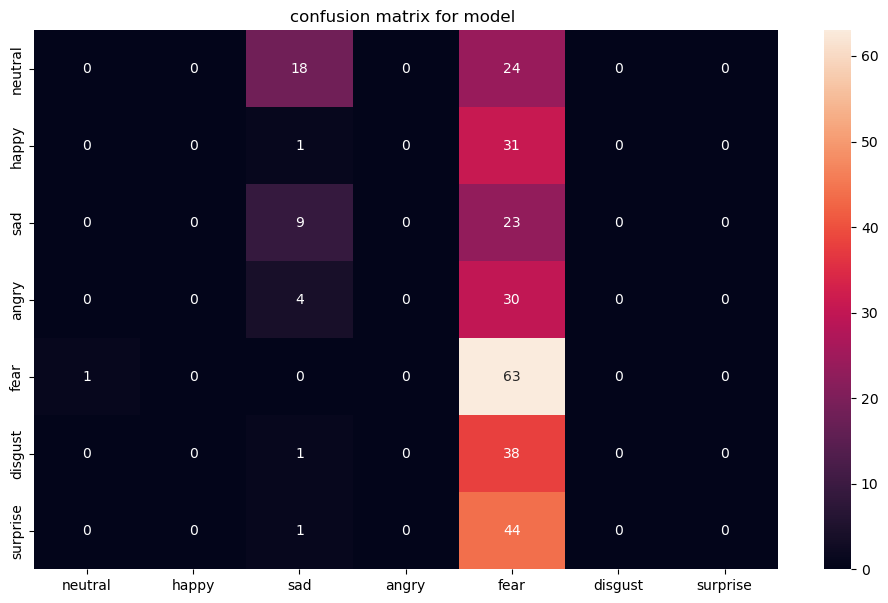

In [48]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [49]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     neutral       0.00      0.00      0.00        42
       happy       0.00      0.00      0.00        32
         sad       0.26      0.28      0.27        32
       angry       0.00      0.00      0.00        34
        fear       0.25      0.98      0.40        64
     disgust       0.00      0.00      0.00        39
    surprise       0.00      0.00      0.00        45

    accuracy                           0.25       288
   macro avg       0.07      0.18      0.10       288
weighted avg       0.08      0.25      0.12       288

